In [103]:
!pip install numpy matplotlib pandas sklearn

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [104]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Import the dataset



In [105]:
%load_ext memory_profiler
%load_ext line_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [106]:
dataset = pandas.read_csv('data.csv')
# 1.6 ms ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [107]:
%timeit dataset.head()

74.9 µs ± 798 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [108]:
def busy(x):
    return x**2
def train():
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, 1].values
    for i in range(10000):
        busy(i)
    # Split the dataset into the training set and test set
    # We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
    # and 10 rows will go into the testing set.
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

    # Creating a LinearRegression object and fitting it
    # on our trainging set.
    linearRegressor = LinearRegression()
    linearRegressor.fit(xTrain, yTrain)

    # Predicting the test set results
    yPrediction = linearRegressor.predict(xTest)
    
    return xTrain, yTrain, xTest, yTest, linearRegressor


In [109]:
%mprun train()

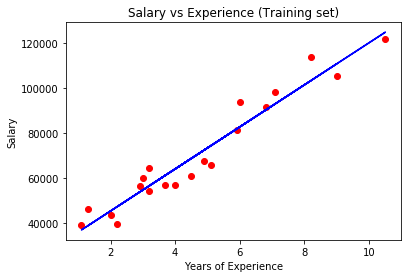

In [110]:


xTrain, yTrain, xTest, yTest, linearRegressor = train()
# Visualising the training set results
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()



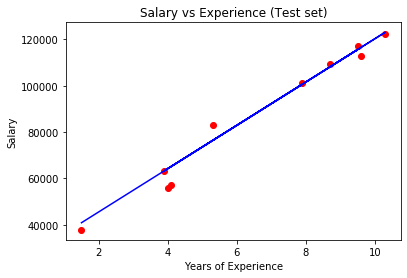

In [111]:

# Visualising the test set results
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTest, linearRegressor.predict(xTest), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

